<a href="https://colab.research.google.com/github/kishan20-00/Time_series_patterns/blob/main/Time_Forecasting_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Common Patterns

Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
      plt.legend(fontsize=14)
    plt.grid(True)

##Trend and Seasonality

In [4]:
def trend(time, slope=0):
  return slope * time

Let's create a time series that just trends upward:

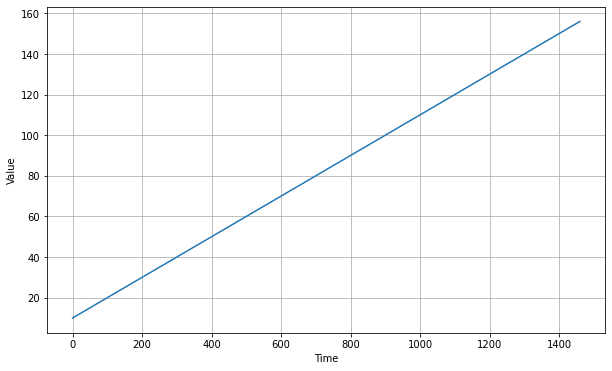

In [6]:
time = np.arange(4* 365 +1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [7]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [8]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

now let's generate a time series with a seasonal pattern:

In [9]:
def seasonal_pattern(season_time):
  """"Just an arbitrary pattern, you can change it if you wish"""
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
  """Repeats the same pattern at each period"""
  season_time = ((time+phase) % period)/ period
  return amplitude * seasonal_pattern(season_time)

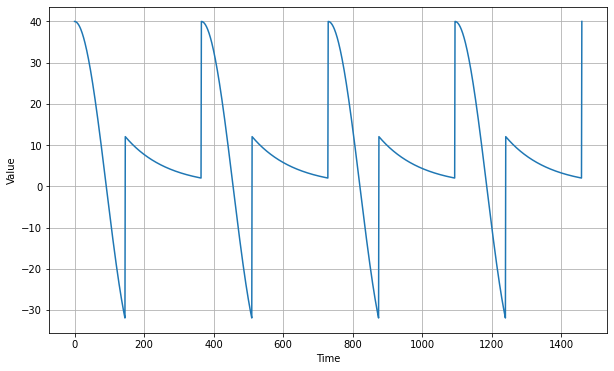

In [11]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

Now, let's create with both trend and seasonality

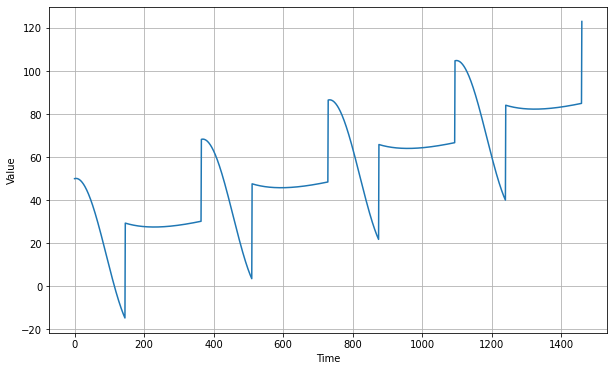

In [12]:
slope = 0.05
series = baseline + trend(time ,slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

## Noise

In [13]:
def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

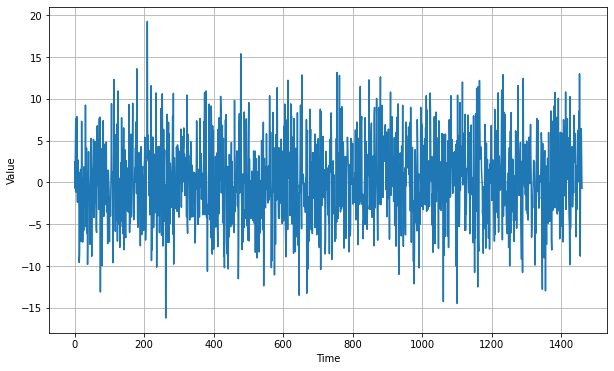

In [14]:
noise_level =5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

Now, we'll add this white noise to the time series with trend and seasonality:

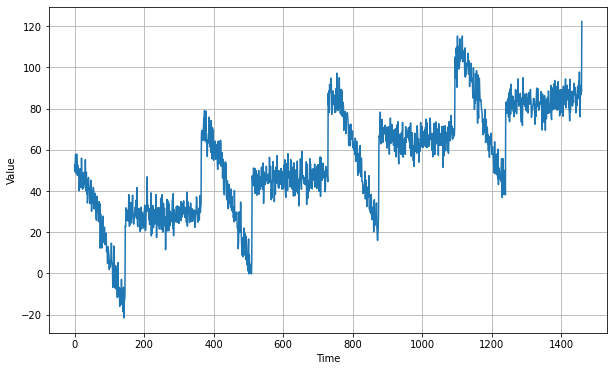

In [15]:
series += noise
plt.figure(figsize=(10, 6))
plot_series(time ,series)
plt.show()